# Additional examples

## 【Example2】Cdia
There is no comparison with ABACUS.

3.6584
2.5623773479114016 %


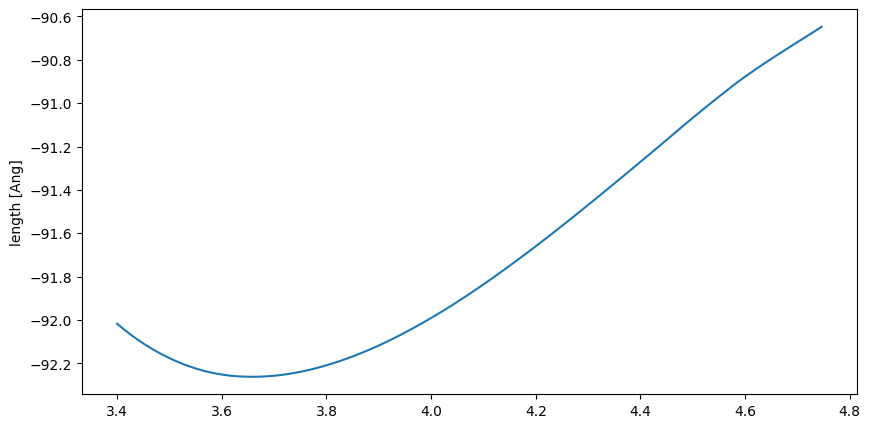

In [ ]:
data=np.genfromtxt(f"Cdia/cdia.EvsLC")

fig=plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_ylabel('length [Ang]')  # y axis label
ax1.plot(data[:,2], data[:,9])

i_min=np.argmin(data[:,9])
a_dft=data[i_min,2]
print(a_dft)
a_true=3.567
print(100*np.abs(a_dft-a_true)/a_true, "%")
plt.show()

In [ ]:
label=3

In [ ]:
data = dpdata.LabeledSystem(f'{label}0.data/Cdia', fmt = 'openmx') 
# data = dpdata.LabeledSystem('10.data/traj6', fmt = 'qe/cp/traj') 
print('# the data contains %d frames' % len(data))
# random choose 40 index for validation_data
index_validation = np.random.choice(len(data),size=100,replace=False)     
# other indexes are training_data
index_training = list(set(range(len(data)))-set(index_validation))       
data_training = data.sub_system(index_training)
data_validation = data.sub_system(index_validation)
# all training data put into directory:"training_data" 
data_training.to_deepmd_npy(f'{label}0.data/training_data')               
# all validation data put into directory:"validation_data"
data_validation.to_deepmd_npy(f'{label}0.data/validation_data')           
print('# the training data contains %d frames' % len(data_training)) 
print('# the validation data contains %d frames' % len(data_validation)) 

# the data contains 1000 frames
# the training data contains 900 frames
# the validation data contains 100 frames


In [ ]:
training_systems = dpdata.LabeledSystem(f"{label}0.data/training_data", fmt="deepmd/npy")
training_systems

Data Summary
Labeled System
-------------------
Frame Numbers      : 900
Atom Numbers       : 16
Including Virials  : No
Element List       :
-------------------
C
16

### 3.Prepare input script

Serial training (not parallel)

In [ ]:
# ! dp neighbor-stat -s 30.data -r 6.0 -t C
! bash train.sh

first index = 2
Instructions for updating:
non-resource variables are not supported in the long term
DEEPMD INFO    Calculate neighbor statistics... (add --skip-neighbor-stat to skip this step)
DEEPMD INFO    training data with min nbor dist: 0.9258628711099713
DEEPMD INFO    training data with max nbor size: [1 2]
DEEPMD INFO     _____               _____   __  __  _____           _     _  _   
DEEPMD INFO    |  __ \             |  __ \ |  \/  ||  __ \         | |   (_)| |  
DEEPMD INFO    | |  | |  ___   ___ | |__) || \  / || |  | | ______ | | __ _ | |_ 
DEEPMD INFO    | |  | | / _ \ / _ \|  ___/ | |\/| || |  | ||______|| |/ /| || __|
DEEPMD INFO    | |__| ||  __/|  __/| |     | |  | || |__| |        |   < | || |_ 
DEEPMD INFO    |_____/  \___| \___||_|     |_|  |_||_____/         |_|\_\|_| \__|
DEEPMD INFO    Please read and cite:
DEEPMD INFO    Wang, Zhang, Han and E, Comput.Phys.Comm. 228, 178-184 (2018)
DEEPMD INFO    Zeng et al, arXiv:2304.09409
DEEPMD INFO    See https://deepmd

### 4.Train a model

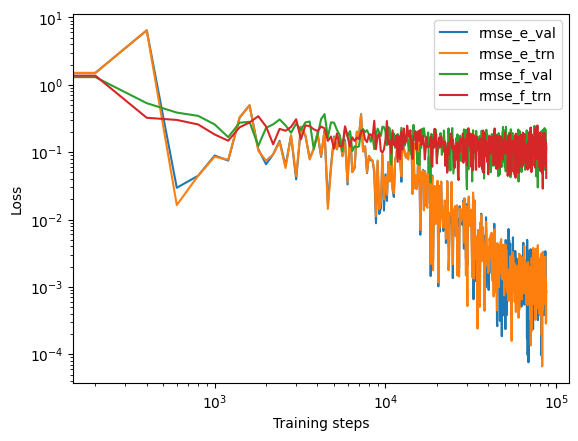

In [ ]:
with open(f"{label}1.train/lcurve.out") as f:
      headers = f.readline().split()[1:]
lcurve = pd.DataFrame(np.loadtxt(f"{label}1.train/lcurve.out"), columns=headers)
legends = ["rmse_e_val", "rmse_e_trn", "rmse_f_val", "rmse_f_trn"]
for legend in legends:
      plt.loglog(lcurve["step"], lcurve[legend], label=legend)
plt.legend()
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.show()

### 5.test a model

For detail of the warnings, please check [Discussions #221](https://github.com/deepmodeling/deepmd-kit/discussions/221).

In [ ]:
training_systems = dpdata.LabeledSystem(f"{label}0.data/training_data", fmt="deepmd/npy")

predict = training_systems.predict(f"{label}1.train/graph.pb")

# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 


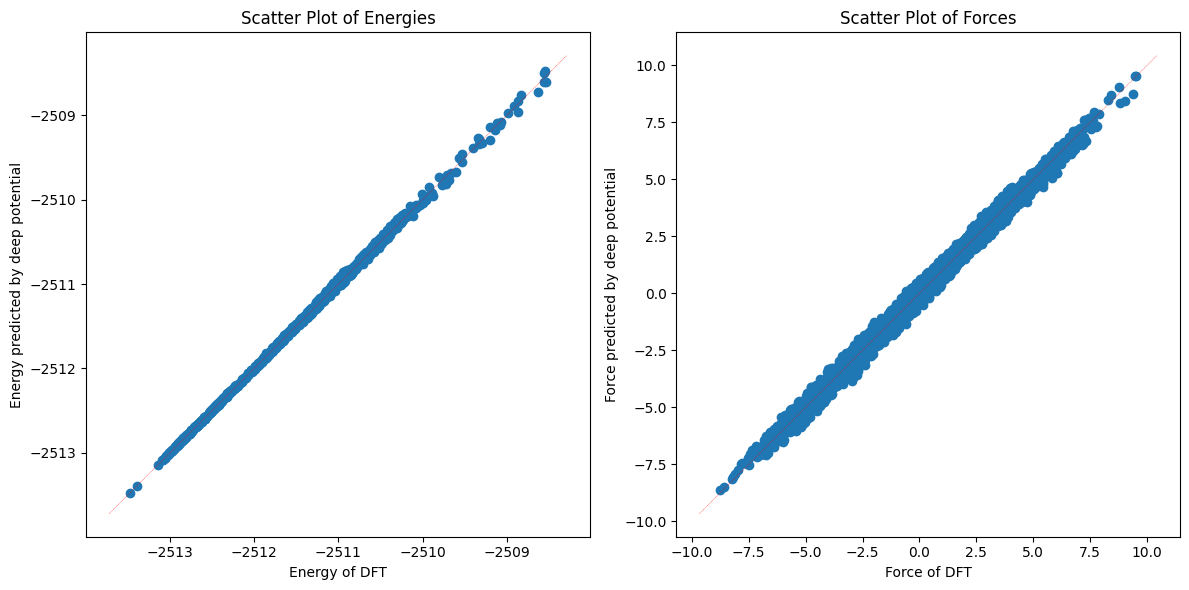

In [ ]:
plt.figure(figsize=(12, 6))

# 1つ目のプロット
plt.subplot(1, 2, 1)  # 1行2列の1番目のサブプロット
plt.scatter(training_systems["energies"], predict["energies"])
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
plt.plot(x_range, x_range, "r--", linewidth=0.25)
plt.xlabel("Energy of DFT")
plt.ylabel("Energy predicted by deep potential")
plt.title('Scatter Plot of Energies')

# 2つ目のプロット
plt.subplot(1, 2, 2)  # 1行2列の2番目のサブプロット
plt.scatter(training_systems["forces"], predict["forces"])
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
plt.plot(x_range, x_range, "r--", linewidth=0.25)
plt.xlabel("Force of DFT")
plt.ylabel("Force predicted by deep potential")
plt.title('Scatter Plot of Forces')

# レイアウト調整
plt.tight_layout()

# プロットの表示
plt.show()


### 6.Run MD with ASE

In [ ]:
filename="Cdia"

In [ ]:
if os.path.exists(f"log/{filename}.log"):
    os.remove(f"log/{filename}.log")
    
! python3 MD.py

Instructions for updating:
non-resource variables are not supported in the long term
2023-11-25 15:53:06.440394: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
/opt/homebrew/lib/python3.11/site-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of lower bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound (ignored if warned for more than 10 times) 
# warning: loc idx out of upper bound

In [ ]:
df = pd.read_csv(
    f"log/{filename}.log",
    delim_whitespace=True,
    names=["Time[ps]", "Etot/N[eV]", "Epot/N[eV]", "Ekin/N[eV]", "T[K]"],
    skiprows=1,
    header=None,
)
df

,Time[ps],Etot/N[eV],Epot/N[eV],Ekin/N[eV],T[K]
0,0.00,-157.0257,-157.0924,0.0666,515.4
1,0.01,-157.0104,-157.0455,0.0350,271.1
2,0.02,-156.9925,-157.0218,0.0293,226.3
3,0.03,-156.9767,-157.0371,0.0604,466.9
4,0.04,-156.9689,-157.0309,0.0620,479.8
...,...,...,...,...,...
116,1.16,-156.9220,-157.0099,0.0879,680.0
117,1.17,-156.9189,-157.0010,0.0821,635.5
118,1.18,-156.9207,-156.9991,0.0783,605.8
119,1.19,-156.9201,-157.0038,0.0837,647.5


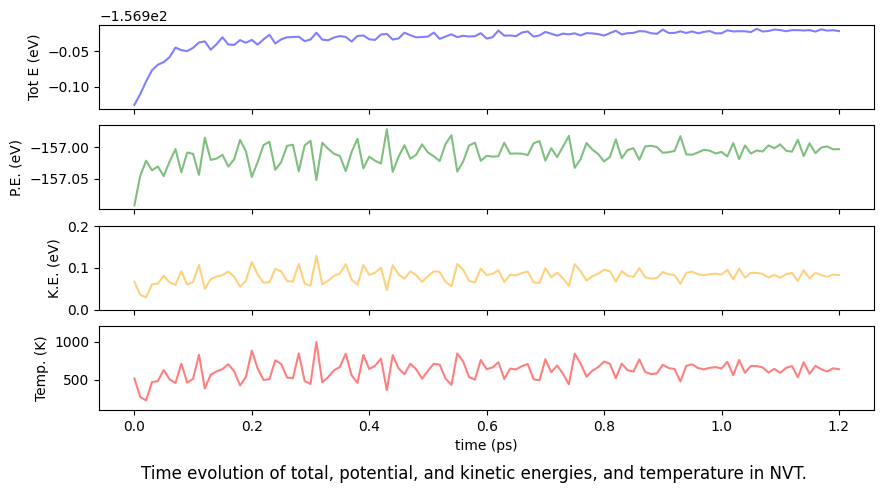

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_xticklabels([])  # x axis label
ax1.set_ylabel('Tot E (eV)')  # y axis label
ax1.plot(df["Time[ps]"], df["Etot/N[eV]"], color="blue",alpha=0.5)

ax2 = fig.add_subplot(4, 1, 2)
ax2.set_xticklabels([])  # x axis label
ax2.set_ylabel('P.E. (eV)')  # y axis label
ax2.plot(df["Time[ps]"], df["Epot/N[eV]"], color="green",alpha=0.5)

ax3 = fig.add_subplot(4, 1, 3)
ax3.set_xticklabels([])  # x axis label
ax3.set_ylabel('K.E. (eV)')  # y axis label
ax3.set_ylim([0.0, 0.2])
ax3.plot(df["Time[ps]"], df["Ekin/N[eV]"], color="orange",alpha=0.5)

ax4 = fig.add_subplot(4, 1, 4)
ax4.set_xlabel('time (ps)')  # x axis label
ax4.set_ylabel('Temp. (K)')  # y axis label
ax4.plot(df["Time[ps]"], df["T[K]"], color="red",alpha=0.5)
ax4.set_ylim([100.,1200])

fig.suptitle("Time evolution of total, potential, and kinetic energies, and temperature in NVT.", y=0)

plt.show()

In [ ]:
from ase import Atoms
from ase.build import bulk
from deepmd.calculator import DP

def calc_density_energy(symbol: str = "C", crystalstructure: str = "diamond"):
    a_array = np.linspace(3.4, 3.9, 10)

    energy_list = []
    density_list = []
    for a in a_array:
        atoms = bulk(name="C", crystalstructure="diamond", a=a).repeat((2,2,2))
        # atoms=Atoms(
        #     "C16",
        #     positions=[
        #         (0.0000, 0.0000, 0.0000),
        #         (0.8900, 0.8900, 0.8900),
        #         (0.0000, 1.7800, 1.7800),
        #         (0.8900, 2.6700, 2.6700),
        #         (1.7800, 0.0000, 1.7800),
        #         (2.6700, 0.8900, 2.6700),
        #         (1.7800, 1.7800, 3.5600),
        #         (2.6700, 2.6700, 4.4500),
        #         (1.7800, 1.7800, 0.0000),
        #         (2.6700, 2.6700, 0.8900),
        #         (1.7800, 3.5600, 1.7800),
        #         (2.6700, 4.4500, 2.6700),
        #         (3.5600, 1.7800, 1.7800),   
        #         (4.4500, 2.6700, 2.6700),
        #         (3.5600, 3.5600, 3.5600),
        #         (4.4500, 4.4500, 4.4500)
        #     ],
        #     cell=[
        #     (-a, 0.0000,a),
        #     ( 0.0000,a,a),  
        #     (-a, a,0.0000)
        #     ],
        # )
        label=3
        atoms.set_calculator(DP(model=f"{label}1.train/graph.pb"))
        E_pot = atoms.get_potential_energy() / len(atoms)
        density = len(atoms) / atoms.get_volume()
        energy_list.append(E_pot)
        density_list.append(density)
    return np.array(energy_list), np.array(density_list)

diamond_energy, diamond_density = calc_density_energy("C", "diamond")

argmin of diamond_energy per atom: 3.6777777777777776
percentage of error: 3.1056287574369894 %


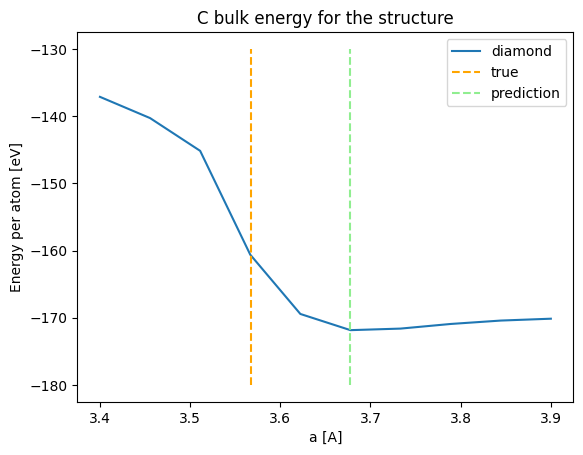

In [ ]:
a_array = np.linspace(3.4, 3.9, 10)
plt.plot(a_array,diamond_energy, label="diamond")

i_min=np.argmin(np.array(diamond_energy))
a_pred=a_array[i_min]
a_true=3.567
print(f"argmin of diamond_energy per atom: {a_pred}") # argmin of diamond_energy per atom
print(f"percentage of error: {100*np.abs(a_pred-a_true)/a_true} %") # percentage of error

plt.xlabel("a [A]")
plt.vlines(a_true,-180,-130,color="orange",linestyle="--", label="true")
plt.vlines(a_pred,-180,-130,color="lightgreen",linestyle="--", label="prediction")
plt.ylabel("Energy per atom [eV]")
plt.legend()
plt.title("C bulk energy for the structure")
plt.show()